#### 무게를 찾기
- 목표 : 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight
- Perch, 농어

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# 데이터 준비 및 피쳐/타겟 분석
FILE = '../data/fish.csv'
fishdf = pd.read_csv(FILE)
fishdf

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [54]:
fishdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [55]:
fishdf.value_counts()

Species    Weight  Length  Diagonal  Height   Width 
Bream      242.0   25.4    30.0      11.5200  4.0200    1
Pike       500.0   45.0    48.0      6.9600   4.8960    1
           200.0   32.3    34.8      5.5680   3.3756    1
           300.0   34.0    37.8      5.7078   4.1580    1
                   35.0    38.8      5.9364   4.3844    1
                                                       ..
Perch      85.0    20.0    21.0      5.0820   2.7720    1
           100.0   18.0    19.2      5.2224   3.3216    1
           110.0   21.0    22.5      5.6925   3.5550    1
                   22.0    23.5      5.5225   3.9950    1
Whitefish  1000.0  40.0    43.5      12.3540  6.5250    1
Name: count, Length: 159, dtype: int64

In [56]:
fishdf['Weight'], fishdf['Length']
perchdf=fishdf[fishdf['Species']=='Perch']
perchdf.value_counts()
perchdf.isna()
perchdf.reset_index(drop=True, inplace=True)
perchdf

,Species,Weight,Length,Diagonal,Height,Width
0,Perch,5.9,8.4,8.8,2.1120,1.4080
1,Perch,32.0,13.7,14.7,3.5280,1.9992
2,Perch,40.0,15.0,16.0,3.8240,2.4320
3,Perch,51.5,16.2,17.2,4.5924,2.6316
4,Perch,70.0,17.4,18.5,4.5880,2.9415
5,Perch,100.0,18.0,19.2,5.2224,3.3216
6,Perch,78.0,18.7,19.4,5.1992,3.1234
7,Perch,80.0,19.0,20.2,5.6358,3.0502
8,Perch,85.0,19.6,20.8,5.1376,3.0368
9,Perch,85.0,20.0,21.0,5.0820,2.7720


In [57]:
feacutres=pd.concat([perchdf['Weight'],perchdf['Length']], axis=1)
feacutres



,Weight,Length
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4
5,100.0,18.0
6,78.0,18.7
7,80.0,19.0
8,85.0,19.6
9,85.0,20.0


In [58]:
target=perchdf['Weight']
target.shape

(56,)

In [59]:
feacutres.corr()

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


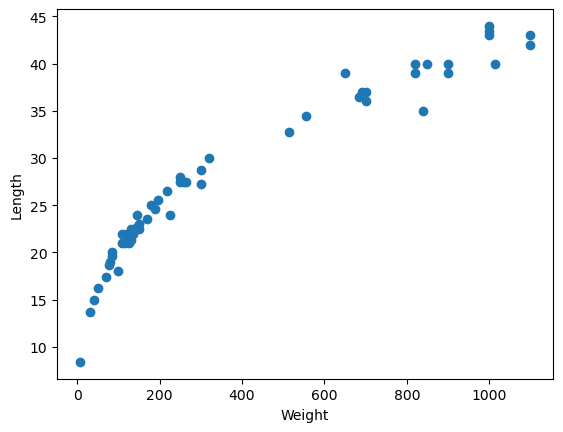

In [60]:
plt.scatter(perchdf['Weight'], perchdf['Length'])
plt.xlabel('Weight')
plt.ylabel('Length')
plt.plot()
plt.show()

In [61]:
# 피쳐 분석 -> 상관계수값, 시각화 2가지 모두 고려해야함

### 2. 학습 준비
- 학습 알고리즘 : KNN Regressor (회귀)
- 피쳐 스케일링
- 학습용/테스트용 데이터셋 분리

In [62]:
# 2-1피쳐와 타겟 분리
featuredf=perchdf[['Length']]
targeSR=perchdf['Weight']




### 2-2 학습용과 테스트용 데이터셋 분리
- 전체 데이터셋 -> 학습용:테스트용=75:25, 80:20, 70:30
- 회귀 데이터셋 -> 데이터셋 구성 요소에 대한 비율 고려하지 않아도됨

In [63]:
from sklearn.model_selection import train_test_split


In [64]:
x_train, x_test, y_train, y_test = train_test_split(featuredf, targeSR,
                                                    random_state=10) # 똑같은 상황을 만들어서 모델 최적화

In [65]:
print(f'{x_train.shape}, {x_train.ndim}')
print(f'{y_train.shape}, {y_train.ndim}')

print()

print(f'{x_test.shape}, {x_test.ndim}')
print(f'{y_test.shape}, {y_test.ndim}')

(42, 1), 2
(42,), 1

(14, 1), 2
(14,), 1


In [66]:
x_train=x_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

x_test=x_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

#### 2-3. 피쳐 스케일링


In [67]:
# 수치형인지 확인, 선형 비선형인지 확인
from sklearn.preprocessing import MinMaxScaler
myscalr = MinMaxScaler() # 최대, 최소, 표준편차 계산

In [68]:
# 스케일러에 데이터셋 전용에 속성값 설정
myscalr.fit(x_train)

MinMaxScaler()

In [69]:
myscalr.min_, myscalr.scale_, myscalr.data_min_, myscalr.data_max_

# myscaler.min_ : 변환된 데이터에서 각 컬럼의 최소값 MinMaxScaler를 사용하면
# 범위를 0~1로 지정함
# scale_ : 원래 데이터의 분포를 특정 범위로 변환 한 값 0~1 값
# data_min_, data_max_ : 원본 데이터의 최소값과 최대값을 나타냄

(array([-0.23595506]), array([0.02808989]), array([8.4]), array([44.]))

In [70]:
# 학습용 테스트용 데이터셋 스케일링 진행
x_train_scale=myscalr.transform(x_train)
x_test_scale=myscalr.transform(x_test)

### 3. 학습진행

In [71]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=3) # 3개를 평균내서 예측함
neigh.fit(X, y)
print(neigh.predict([[1.5]])) # 결과

[0.33333333]


In [72]:
distance, index = neigh.kneighbors([[3]]) # 거리값
index=index.reshape(-1)
print(distance, index) # 거리를 젠 값을 표시

[[0. 1. 2.]] [3 2 1]


In [73]:
for idx in index.tolist():
    print(idx, y[idx])

3 1
2 1
1 0


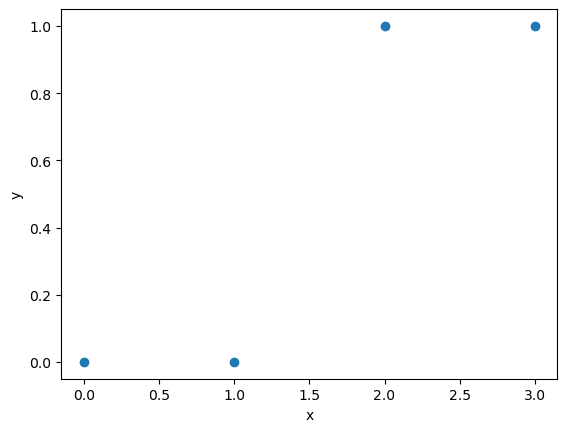

In [74]:
plt.scatter([0,1,2,3], [0,0,1,1])
plt.xlabel('x')
plt.ylabel('y')
plt.plot()
plt.show()

In [75]:

from sklearn.neighbors import KNeighborsRegressor
#학습 모델 인스턴스 생성
model = KNeighborsRegressor() # n개를 평균내서 예측함

model.fit(x_train_scale, y_train) # 학습데이터로 진행


KNeighborsRegressor()

In [76]:
# 모델 파라미터 -> 학습 후, fit() 실행 후 설정되는 매개변수 속성 확인
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(1, 42, 'euclidean', {})

### 4. 최적의 k 찾기

In [77]:
scores={}
for k in range(1, model.n_samples_fit_+1):

    model.n_neighbors=k # 최근접 이웃의 갯수 설정 -> 모델 성능 좌우 : 하이퍼 파라미터

    # 성능평가
    score = model.score(x_test_scale, y_test)

    scores[k]=score


<function matplotlib.pyplot.show(close=None, block=None)>

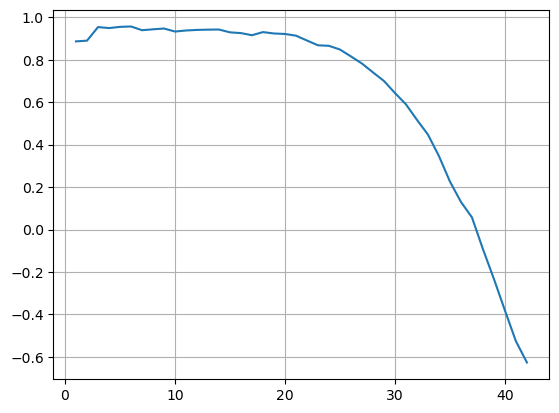

In [78]:
plt.plot(list(scores.keys()),list(scores.values()))
plt.grid()
plt.show

In [79]:
best_k=sorted(scores.items(), key=lambda x: x[1], reverse=True)[0][0]
best_k
# k가 6일때 가장 높다.

6

### 예측할때 predeict()
#### 5. 새로운 데이터 무계 예측하기


In [80]:
model.n_neighbors=best_k

In [81]:
new_length=input('농어 길이 :')
print(f'new_length :{new_length}')

new_length :45


In [82]:
# 모델에 넣기전에 고려할거
# 2D 모델, 스케일링 적용
# DataFrame으로 만들기
datadf=pd.DataFrame([[new_length]], columns=['Length'])
datadf

,Length
0,45


In [83]:
# 피쳐 스케일링
data_scale=myscalr.transform(datadf)

In [84]:
model.predict(data_scale)

array([1008.33333333])

In [85]:
distance, index = model.kneighbors(data_scale)

print(distance, index, sep='\n')

[[0.02808989 0.04213483 0.05617978 0.05617978 0.08426966 0.14044944]]
[[31 27 30  3 15 12]]


In [86]:
x_train.iloc[index.reshape(-1)]

,Length
31,44.0
27,43.5
30,43.0
3,43.0
15,42.0
12,40.0


In [87]:
x_train_scale[[31, 27, 30,  3 ,15 ,12]]

array([[1.        ],
       [0.98595506],
       [0.97191011],
       [0.97191011],
       [0.94382022],
       [0.88764045]])

In [88]:
y_train[index.reshape(-1)].sum()/model.n_neighbors

1008.3333333333334

#### KNN Regressor 단점

In [93]:
new_length = 1
datadf=pd.DataFrame([[new_length]], columns=['Length'])
datadf

# 피쳐 스케일링
data_scale=myscalr.transform(datadf)

In [94]:
model.predict(data_scale)

array([60.98333333])

### 학습데이터의 범위를 벗어난 더 큰 데이터나 더 작은 데이터의 경우
### 정확한 예측을 할 수 없음.....

### 예측을 벗어나는 값을 정확하게 예측해야할 때는 사용할 수 없음.